In [491]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import sys
from sklearn.linear_model import LinearRegression

In [884]:
import skimage.data
import matplotlib.image as mpimg 
img=skimage.data.rocket()
#img=mpimg.imread('data/1.jpg')
#img=mpimg.imread('data/cat.jpg')

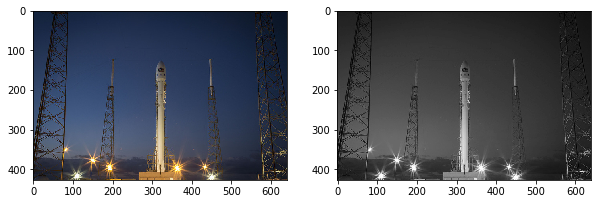

In [885]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(skimage.color.rgb2gray(img),cmap=plt.cm.gray)

In [886]:
igrey=skimage.color.rgb2gray(img)

In [887]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.21, 0.72, 0.07])

In [888]:
def showlab(lab):
    return (lab+[0,128,128])/[100,255,255]

In [889]:
ilab=skimage.color.rgb2lab(img)

In [890]:
ilab1=(ilab+[0,128,128])/[100,255,255]
ilab2=ilab1*[100,255,255]-[0,128,128]

In [891]:
igrey1=igrey*[100]

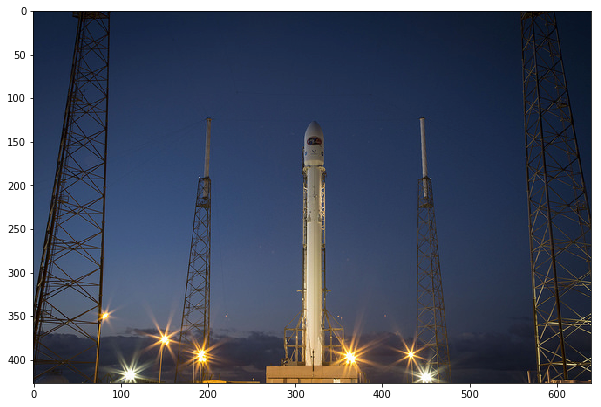

In [892]:
plt.imshow(skimage.color.lab2rgb(ilab2))

In [893]:
limg[:,:,0].shape

(720, 600)

In [899]:
split=300
limg=img[:,:split,:]
rimg=img[:,split:,:]
limg=ilab[:,:split,:]
rimg=ilab[:,split:,:]


Text(0.5, 1.0, 'a channel')

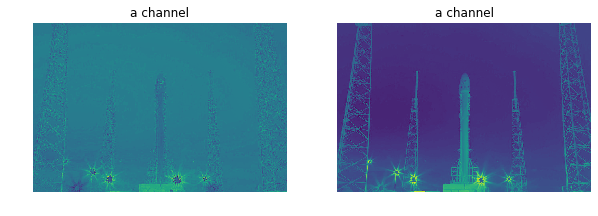

In [900]:
plt.rcParams["figure.figsize"] = (10,10)

plt.subplot(121)
plt.imshow(ilab1[:,:,1])
plt.axis('off')
plt.title("a channel")
plt.subplot(122)
plt.imshow(ilab1[:,:,2])
plt.axis('off')

plt.title("a channel")


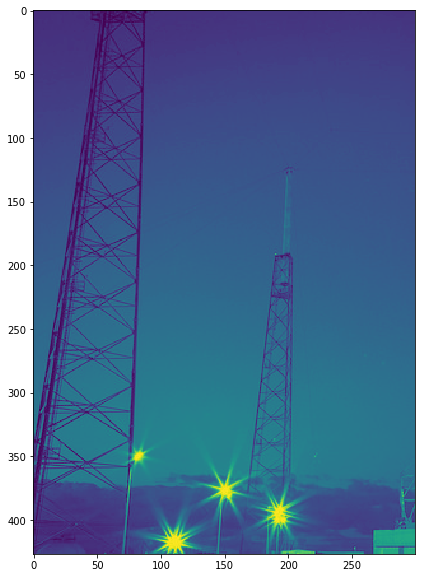

In [901]:
plt.imshow(limg[:,:,0])

In [902]:
grey3x3=[]
a3x3=[]
b3x3=[]
for row in range(limg.shape[0]-2):
    for col in range(limg.shape[1]-2):
        grey3x3.append(limg[row:row+3,col:col+3,0])
        a3x3.append(limg[row:row+3,col:col+3,1])
        b3x3.append(limg[row:row+3,col:col+3,2])
grey3x3=np.array(grey3x3)
a3x3=np.array(a3x3)
b3x3=np.array(b3x3)

inputX=grey3x3.reshape((grey3x3.shape[0],9))

y_a=limg[:,:,1][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)
y_b=limg[:,:,2][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)

In [903]:
limg_edge=limg[1:limg.shape[0]-1,1:limg.shape[1]-1,:]
rimg_edge=rimg[1:rimg.shape[0]-1,1:rimg.shape[1]-1,:]

In [904]:
grey3x3=[]
a3x3=[]
b3x3=[]
for row in range(rimg.shape[0]-2):
    for col in range(rimg.shape[1]-2):
        grey3x3.append(rimg[row:row+3,col:col+3,0])
        a3x3.append(rimg[row:row+3,col:col+3,1])
        b3x3.append(rimg[row:row+3,col:col+3,2])
grey3x3=np.array(grey3x3)
a3x3=np.array(a3x3)
b3x3=np.array(b3x3)

test_X=grey3x3.reshape((grey3x3.shape[0],9))

test_a=rimg[:,:,1][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)
test_b=rimg[:,:,2][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)

In [905]:
lr_a=LinearRegression().fit(inputX,y_a)

print(lr_a.score(test_X,test_a))

pred_a=lr_a.predict(test_X)

pred_a=pred_a.astype('uint8')
pred_a=pred_a.reshape(rimg.shape[0]-2,rimg.shape[1]-2)

-0.07281296598890874


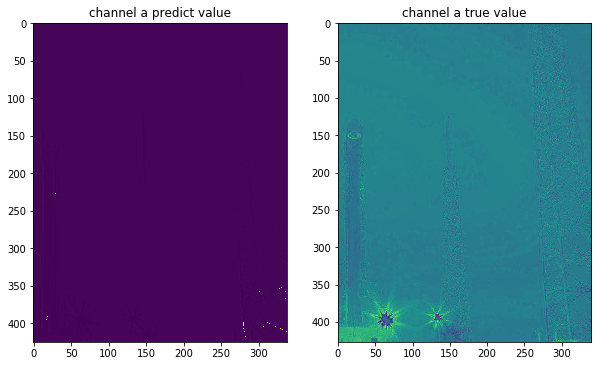

In [906]:
plt.subplot(121)
plt.imshow(pred_a)
plt.gca().set_title('channel a predict value')
plt.subplot(122)
plt.imshow(rimg[:,:,1])
plt.gca().set_title('channel a true value')

plt.show()

In [907]:
lr_b=LinearRegression().fit(inputX,y_b)

print(lr_b.score(test_X,test_b))

pred_b=lr_b.predict(test_X)

pred_b=pred_b.astype('uint8')
pred_b=pred_b.reshape(rimg.shape[0]-2,rimg.shape[1]-2)

-0.0007983345585798053


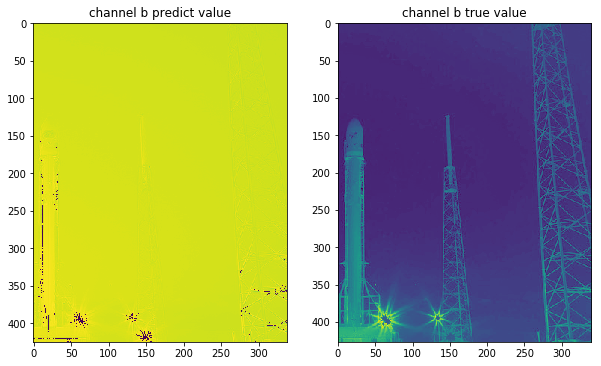

In [908]:
plt.subplot(121)
plt.imshow(pred_b)
plt.gca().set_title('channel b predict value')
plt.subplot(122)
plt.imshow(rimg[:,:,2])
plt.gca().set_title('channel b true value')

plt.show()

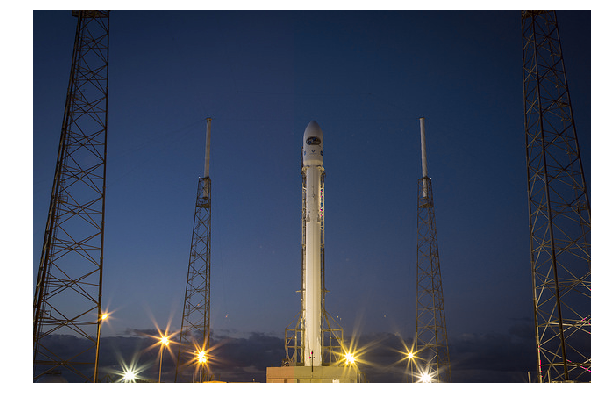

In [914]:
pred_rimg=np.array([rimg[:,:,0][1:rimg.shape[0]-1,1:rimg.shape[1]-1],pred_a,rimg_edge[:,:,2]])

pred_rimg=pred_rimg.transpose((1,2,0))

compare_img=np.append(limg_edge,pred_rimg,axis=1)
plt.axis('off')

plt.imshow(skimage.color.lab2rgb(compare_img))
#plt.savefig('data/cat_regression_lab.jpg',dpi='figure',quality=100)

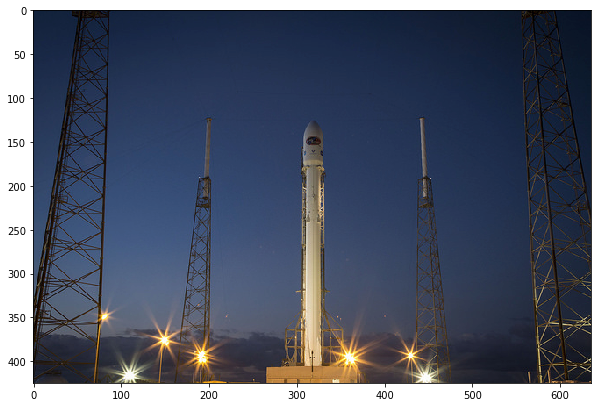

In [916]:
true_rimg=np.array([rimg_edge[:,:,0],rimg_edge[:,:,1],rimg_edge[:,:,2]])

true_rimg=true_rimg.transpose((1,2,0))

compare_img=np.append(limg_edge,true_rimg,axis=1)
plt.imshow(skimage.color.lab2rgb(compare_img))



In [917]:
np.linalg.norm(true_rimg-pred_rimg)

1895.1503174880975

In [825]:
lr_a.coef_

array([-0.00487769,  0.04464308, -0.01134752, -0.0225936 , -0.08440183,
        0.06297996,  0.00321885,  0.01960364, -0.01327031])

In [826]:
lr_b.coef_

array([ 0.07328399,  0.05637659,  0.10784863,  0.10301526, -0.28856912,
        0.08620897,  0.09233064,  0.27917459,  0.0582481 ])

In [769]:
lr_a=LinearRegression().fit(inputX,y_a)

print(lr_a.score(inputX,y_a))

pred_a=lr_a.predict(inputX)

pred_a=pred_a.astype('uint8')
pred_a=pred_a.reshape(limg.shape[0]-2,limg.shape[1]-2)

0.256763395409803


In [770]:
lr_b=LinearRegression().fit(inputX,y_b)

print(lr_b.score(inputX,y_b))

pred_b=lr_b.predict(inputX)

pred_b=pred_b.astype('uint8')
pred_b=pred_b.reshape(limg.shape[0]-2,limg.shape[1]-2)

0.1748972035495283


/Users/ciuji/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 8285 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


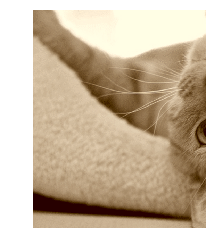

In [771]:
pred_rimg=np.array([limg[:,:,0][1:limg.shape[0]-1,1:limg.shape[1]-1],pred_a,pred_b])

pred_rimg=pred_rimg.transpose((1,2,0))

#compare_img=np.append(limg_edge,pred_rimg,axis=1)
plt.axis('off')

plt.imshow(skimage.color.lab2rgb(pred_rimg))


array([-0.01178857,  0.04123399, -0.01247988, -0.03346434, -0.0705035 ,
        0.06764489,  0.00441541,  0.0147247 , -0.01508184])

In [ ]:
l1_filter=np.zeros((2,3,3))

l1_filter[0, :, :] = np.array([[[-1, 0, 1],   
                                   [-1, 0, 1],   
                                   [-1, 0, 1]]])  
l1_filter[1, :, :] = np.array([[[1,   1,  1],   
                                   [0,   0,  0],   
                                   [-1, -1, -1]]]) 


l1_filter_random=np.random.rand(2,3,3)

def conv(img, conv_filter):
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            return
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        return 
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        return

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.


def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = numpy.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in numpy.uint16(numpy.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in numpy.uint16(numpy.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on 
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)), 
                              c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0), 
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return final_result



cov_output=conv(limg[:,:,2],l1_filter)
plt.imshow(cov_output[:,:,1])

cov_output.shape

plt.imshow(cov_output[:,:,1])

In [741]:
a=skimage.data.chelsea()

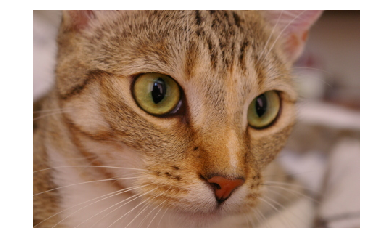

In [744]:
plt.imshow(a)
plt.axis('off')
plt.savefig('data/chelsea_original.jpg',dpi='figure',quality=100)